In [1]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt


In [2]:

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) ,
                                transforms.Grayscale(),
                                ])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
train_subset, val_subset = torch.utils.data.random_split(trainset, [40000, 10000], generator=torch.Generator().manual_seed(1))
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)


classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:

#trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)
trainloader = torch.utils.data.DataLoader(dataset=train_subset, batch_size=len(train_subset), shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(dataset=val_subset, batch_size=len(val_subset), shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset),shuffle=False, num_workers=2)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# pca

# autoencoder

In [5]:
class Autoencoder(nn.Module):

    def __init__(self, input_size=32*32*1, output_size=10):
        super().__init__()
        # encoder
        self.enc1 = nn.Linear(input_size, 256)
        self.enc2 = nn.Linear(256,128)
        self.enc3 = nn.Linear(128,128)
        self.enc4 = nn.Linear(128,64)
        self.enc5 = nn.Linear(64,output_size)

        # decoder 
        self.dec1 = nn.Linear(output_size, 64)
        self.dec2 = nn.Linear(64, 128)
        self.dec3 = nn.Linear(128,128)
        self.dec4 = nn.Linear(128,256)
        self.dec5 = nn.Linear(256,input_size)

      
       
    def forward(self, x):

        x = F.relu(self.enc1(x))
        x = F.relu(self.enc2(x))
        x = F.relu(self.enc3(x))
        x = F.relu(self.enc4(x))
        x = F.relu(self.enc5(x))

        x = F.relu(self.dec1(x))
        x = F.relu(self.dec2(x))
        x = F.relu(self.dec3(x))
        x = F.relu(self.dec4(x))
        x = F.relu(self.dec5(x))
        return x


In [6]:

model = Autoencoder()
model.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [7]:
def train(trainloader,valloader,model,epochs):
  

  train_losses = []
  val_losses = []
  train_acc = []
  val_acc  = []

  for i in range(epochs):
    
      trn_corr = 0
      val_corr = 0
      batch_corr = 0
      val_batch_corr = 0
      loss_sum_train =0
      loss_sum_val =0
      

      for b_iter,data in enumerate(trainloader):
        b_iter +=1
        inputs , _ = data
        inputs = inputs.view(inputs.size(0), -1).to(device)
        y_pred = model(inputs).to(device)
        
        loss = criterion(y_pred,inputs)
        loss_sum_train += loss.item()
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        
      train_losses.append(loss_sum_train/b_iter)
      
      

      with torch.no_grad():
        b_iter = 0
        for b_iter,data in enumerate(valloader):
          b_iter +=1
          inputs , _ = data
          input = inputs.reshape(-1, 32*32*1).to(device)
          y_val = model(input).to(device)
          loss_v = criterion(y_val,input)
          loss_sum_val += loss_v.item()
          
        
        val_losses.append(loss_sum_val/b_iter)

        print('epoch: {} , loss_train: {}  , loss_val: {} '.format(i,loss_sum_train/b_iter,loss_sum_val/b_iter))

  return model,train_losses, val_losses

In [9]:
model , train_losses, val_losses = train(trainloader,valloader,model,50)

epoch: 0 , loss_train: 0.7744740941532099  , loss_val: 0.18862488600099162 
epoch: 1 , loss_train: 0.7283237711259514  , loss_val: 0.18179118481411297 
epoch: 2 , loss_train: 0.7064123149890049  , loss_val: 0.1777469402855369 
epoch: 3 , loss_train: 0.6978414149800684  , loss_val: 0.17644400021452813 
epoch: 4 , loss_train: 0.6933181274468732  , loss_val: 0.17558025734819424 
epoch: 5 , loss_train: 0.687694350245652  , loss_val: 0.1736942717603817 
epoch: 6 , loss_train: 0.6793575389370038  , loss_val: 0.17164912335811908 
epoch: 7 , loss_train: 0.6741459659140581  , loss_val: 0.1711647331145159 
epoch: 8 , loss_train: 0.671253000569951  , loss_val: 0.17038104222838285 
epoch: 9 , loss_train: 0.6677411369457367  , loss_val: 0.1695886300817417 
epoch: 10 , loss_train: 0.6659390053172021  , loss_val: 0.16919820390309498 
epoch: 11 , loss_train: 0.6636076381631718  , loss_val: 0.16893004317572163 
epoch: 12 , loss_train: 0.6622379714516318  , loss_val: 0.16861743665045234 
epoch: 13 , los

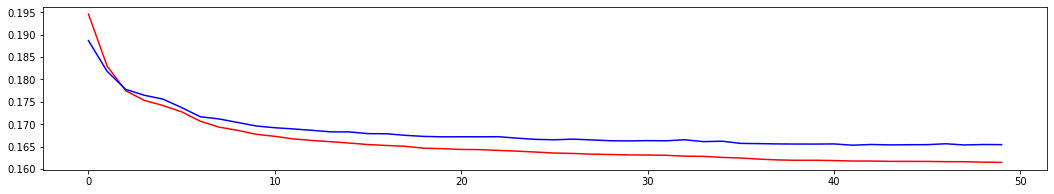

In [10]:
plt.figure(figsize=(18,3)) 
plt.plot(train_losses, c='red')
plt.plot(val_losses, c='blue')
plt.show()

# د

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("data.csv")

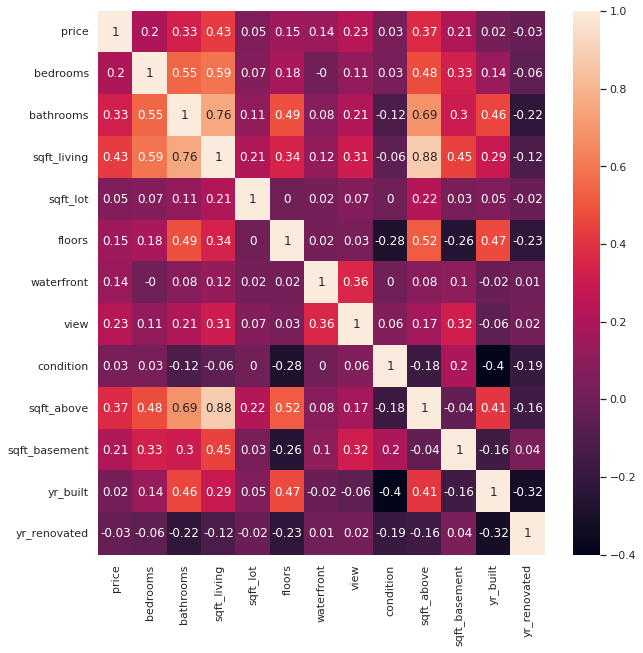

In [3]:
correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(10,10)})
# annot = True 
sns.heatmap(data = correlation_matrix, annot = True)

# و

# linear regression

In [14]:
import pandas as pd
df = pd.read_csv("data.csv")

In [15]:
df.drop('date', axis=1, inplace=True)

In [16]:
def remove_outliers(data, x):
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed\n")
    return data

In [17]:
df = remove_outliers(df, 'price')

Outliers of price are removed



In [18]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['street','city','statezip','country']
for i in categorical_columns :
  labelencoder = LabelEncoder()
  df[i] = labelencoder.fit_transform(df[i])

In [19]:
x = df.drop('price',axis =1)
y = df['price']

In [20]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
x_scaled = s_scaler.fit_transform(x)

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_scaled, y)

LinearRegression()

In [22]:
intercept = regressor.intercept_
features = pd.DataFrame(regressor.coef_, x.columns, columns=['coefficient'])
features.head()

,coefficient
bedrooms,-24413.430114
bathrooms,30929.871283
sqft_living,72411.383224
sqft_lot,-6907.183790
floors,24801.761613


In [23]:
features.coefficient = features.coefficient.abs()

In [24]:
stdevs = []
for i in x.columns:
    stdev = df[i].std()
    stdevs.append(stdev)
 
import numpy as np
features["stdev"] = np.array(stdevs).reshape(-1,1)
features["importance"] = features["coefficient"] * features["stdev"]


In [25]:
features

,coefficient,stdev,importance
bedrooms,24413.430114,0.881215,2.151348e+04
bathrooms,30929.871283,0.715171,2.212015e+04
sqft_living,72411.383224,810.138266,5.866323e+07
sqft_lot,6907.183790,36141.110719,2.496333e+08
floors,24801.761613,0.536898,1.331601e+04
waterfront,3490.695474,0.060815,2.122882e+02
view,18828.031354,0.644964,1.214340e+04
condition,17699.003254,0.669194,1.184407e+04
sqft_above,62651.591980,763.543329,4.783721e+07
sqft_basement,25622.068568,422.527450,1.082603e+07


In [26]:
features['importance_normalized'] = 100*features['importance'] / features['importance'].max()

In [27]:
features

,coefficient,stdev,importance,importance_normalized
bedrooms,24413.430114,0.881215,2.151348e+04,0.008618
bathrooms,30929.871283,0.715171,2.212015e+04,0.008861
sqft_living,72411.383224,810.138266,5.866323e+07,23.499763
sqft_lot,6907.183790,36141.110719,2.496333e+08,100.000000
floors,24801.761613,0.536898,1.331601e+04,0.005334
waterfront,3490.695474,0.060815,2.122882e+02,0.000085
view,18828.031354,0.644964,1.214340e+04,0.004864
condition,17699.003254,0.669194,1.184407e+04,0.004745
sqft_above,62651.591980,763.543329,4.783721e+07,19.162991
sqft_basement,25622.068568,422.527450,1.082603e+07,4.336772


<BarContainer object of 16 artists>

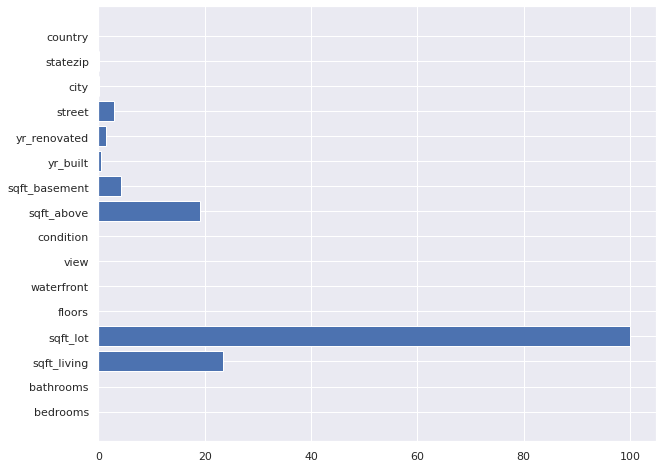

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.barh(features.index, features.importance_normalized)

# DecisionTreeRegressor

In [42]:
from sklearn.tree import DecisionTreeRegressor 
regressor_tree = DecisionTreeRegressor(random_state = 0) 
regressor_tree.fit(x_scaled, y)

DecisionTreeRegressor(random_state=0)

In [43]:
features['importance_normalized'] = 100*features['importance'] / features['importance'].max()

In [44]:
features

,coefficient,stdev,importance,importance_normalized
bedrooms,24413.430114,0.881215,2.151348e+04,0.008618
bathrooms,30929.871283,0.715171,2.212015e+04,0.008861
sqft_living,72411.383224,810.138266,5.866323e+07,23.499763
sqft_lot,6907.183790,36141.110719,2.496333e+08,100.000000
floors,24801.761613,0.536898,1.331601e+04,0.005334
waterfront,3490.695474,0.060815,2.122882e+02,0.000085
view,18828.031354,0.644964,1.214340e+04,0.004864
condition,17699.003254,0.669194,1.184407e+04,0.004745
sqft_above,62651.591980,763.543329,4.783721e+07,19.162991
sqft_basement,25622.068568,422.527450,1.082603e+07,4.336772


<BarContainer object of 16 artists>

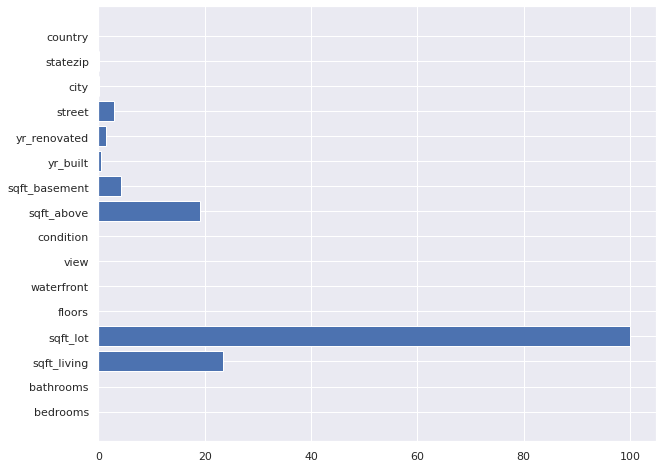

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.barh(features.index, features.importance_normalized)